>> # Stationary Data and adfuller test

**Q. What does it mean for a time series to be stationary?**

Being stationary means that, parameters (like mean, variance, amplitude, frequency) of the models should **not be dependent on time**.

Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.


**For example:** Heart beats (mean=0; standard deviation=1) is stationary — it does not matter when you observe it, it should look much the same at any point in time.

In general, a stationary time series will have no predictable patterns in the long-term.


**Q. Why do we want to know if a time series is stationary?**

If a model's parameter varies over time, then there is a complex relation that needs to be modelled, which all models are not able to account for.

Many models assume the series to be stationary to be able to give useful results.

So, either we want to have a stationary time series, or convert to it.

![example](example_stationary.png)

**Dickey-Fuller Test**
- designed for testing for stationarity.
- It fits an auto regressive model, checks if it worked or not. If it did, then that means it was a stationary time series.

- built in function under statmodels library as `sm.tsa.stattools.adfuller()`
    - This test returns the pvalue.
    - In order for a time series to be stationary, the pvalue should be less than 0.05


In [21]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
mobile_sales =  pd.read_excel('./content/mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [14]:
mobile_sales.set_index('DATE', inplace=True)

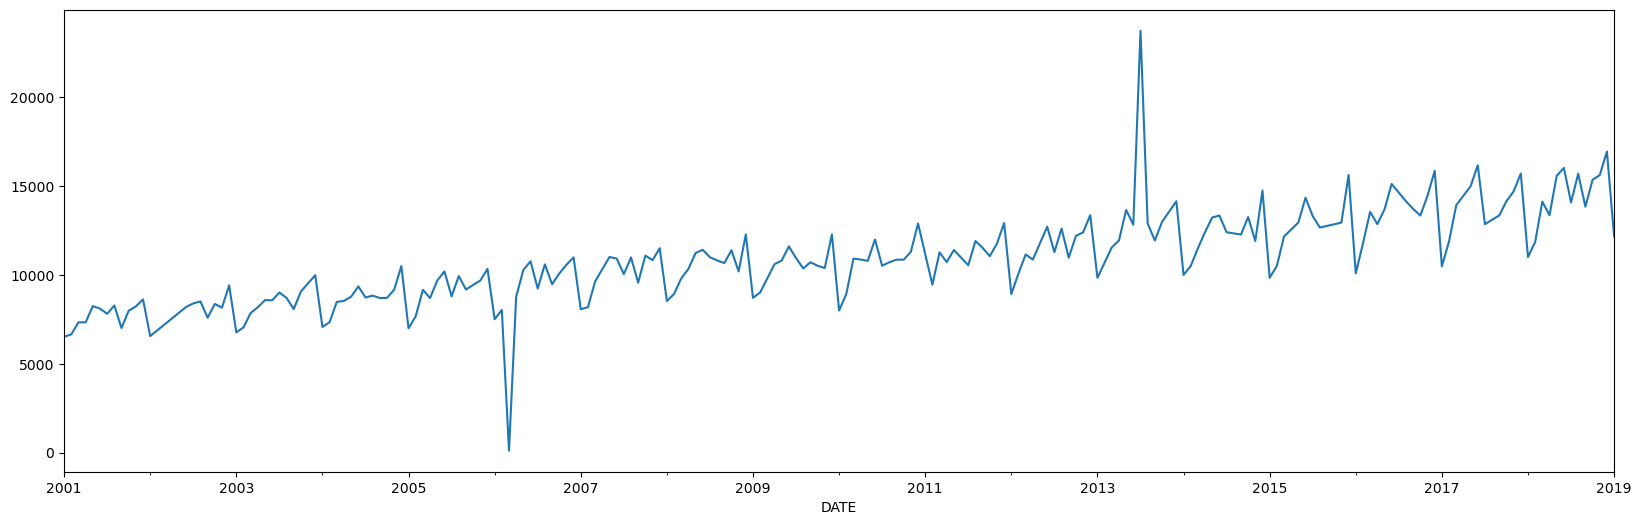

In [23]:
plt.figure(figsize=(20,6))
mobile_sales.Sales.interpolate(method='linear').plot()
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

In [26]:
p_value = sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]

In [48]:
def adf_test(dataset):
    pvalue = sm.tsa.stattools.adfuller(dataset)[1].round(3)
    alpha = 0.05
    if pvalue <= alpha:
        print(f'adfuller test, Sequence is stationary : pvalue {pvalue} <= alpha {alpha}.')
    else:
        print(f'adfuller test, Sequence is not stationary : pvalue {pvalue} > alpha {alpha}. ')

In [50]:
adf_test(mobile_sales.Sales)

adfuller test, Sequence is not stationary : pvalue 0.945 > alpha 0.05. 


> **Q** How do we convert a non stationary time series into a stationary time series?
- if we remove trend and seasonality then data is stationary. 
    - If it's still not stationary, then maybe there's still some seasonality or trend component left in the series.
    - Ideally, trend gets removed in one step. However seasonality can take multiple steps to be removed.
    - These processes are called `Detrending and Deseasonalising` respectively.

adfuller test, Sequence is stationary : pvalue 0.0 <= alpha 0.05.


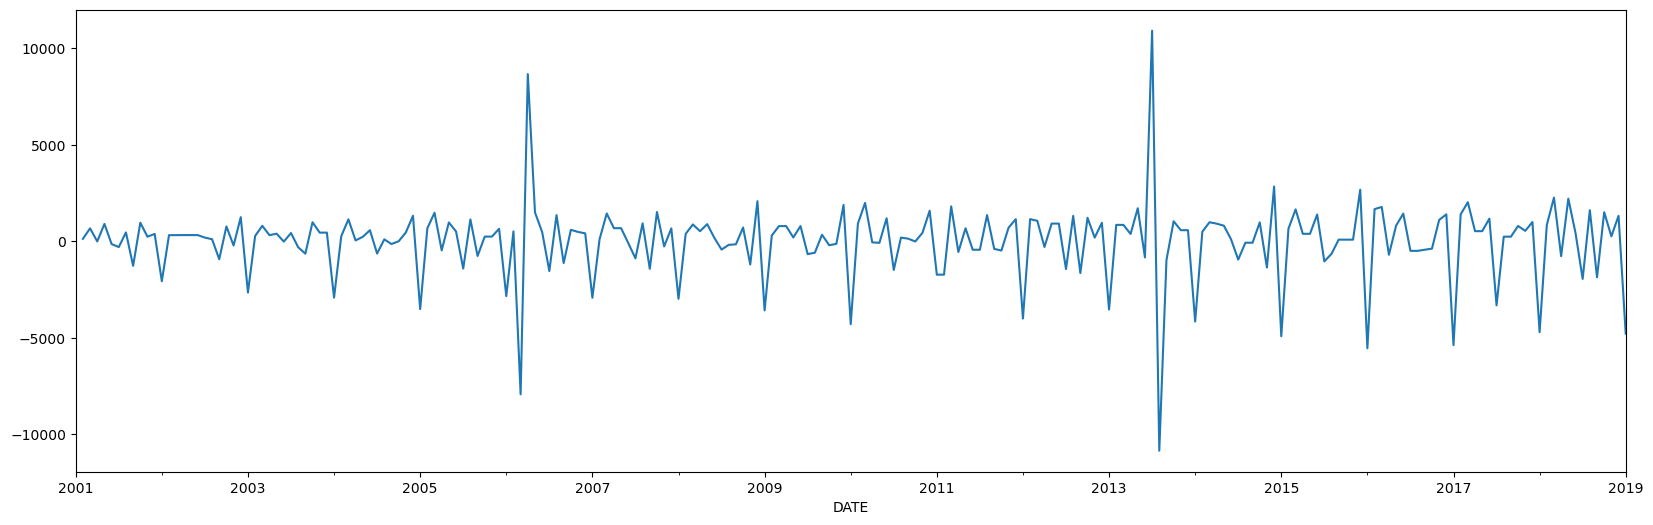

In [63]:
plt.figure(figsize=(20,6))
detrend = mobile_sales.Sales.diff()
detrend.plot()
adf_test(detrend.dropna())

adfuller test, Sequence is stationary : pvalue 0.0 <= alpha 0.05.


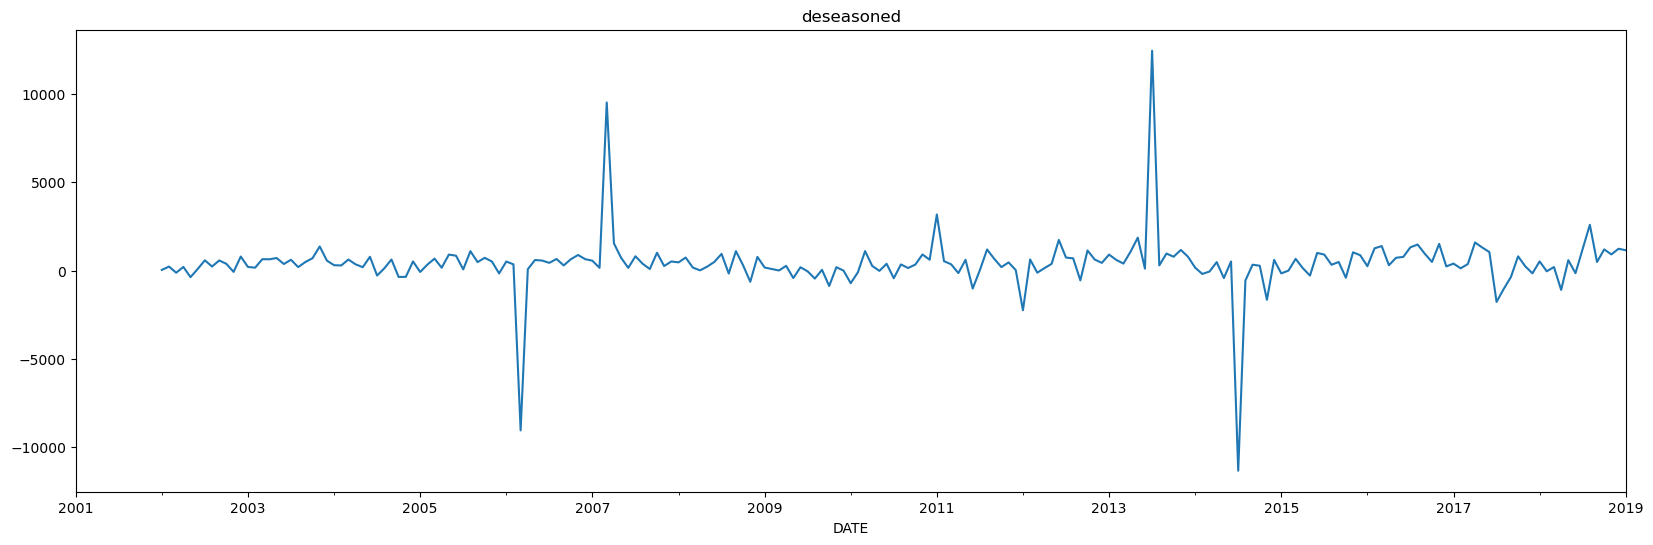

In [66]:
plt.figure(figsize=(20,6))
deseason = mobile_sales.Sales.diff(12)
deseason.plot()
plt.title('deseasoned')
adf_test(deseason.dropna())

adfuller test, Sequence is stationary : pvalue 0.0 <= alpha 0.05.


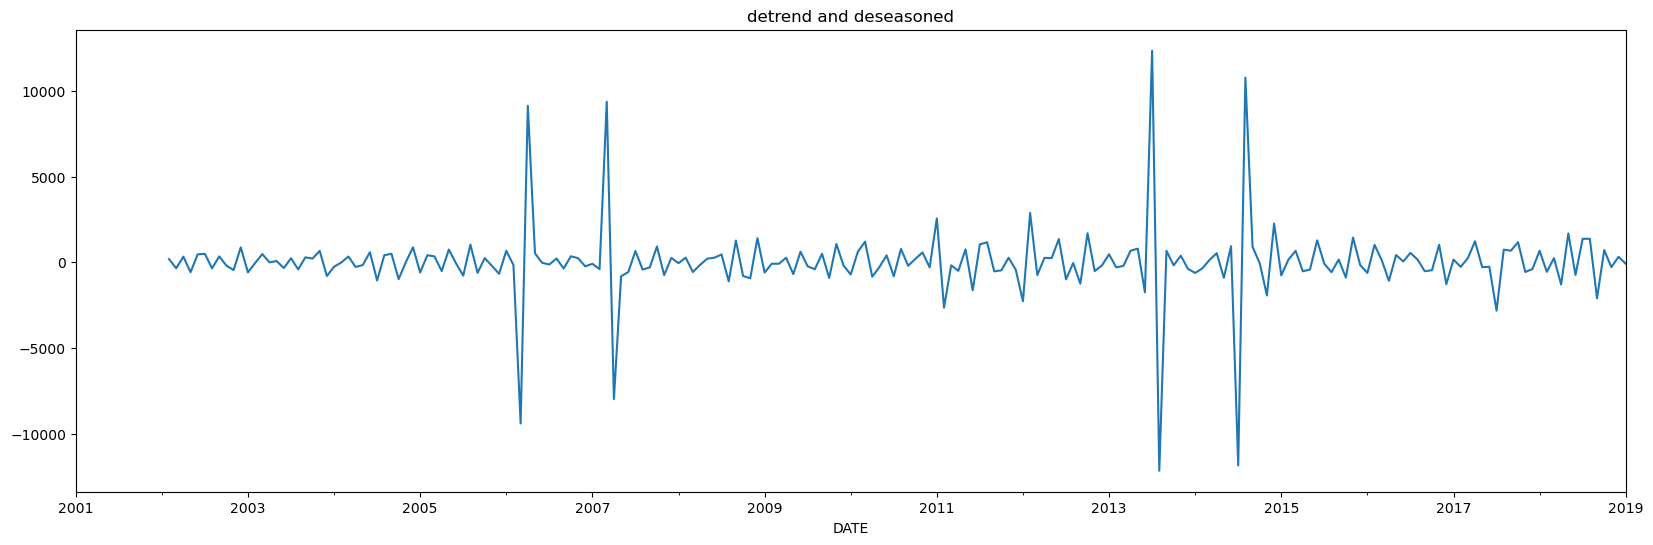

In [69]:
plt.figure(figsize=(20,6))
detrend_deseason = mobile_sales.Sales.diff(1).diff(12)
detrend_deseason.plot()
plt.title('detrend and deseasoned')
adf_test(detrend_deseason.dropna())